# **CAT - 02) Binomial Regression**

Commonly referred to as binary logistic regression, is a type of model used to predict the outcome of a binary depndent variable. Is paarticularly used when the goal is to model the probability of an event occurring based on one or more predictors.

**References:**  
> Agresti, 2007 - Introduction to categorical data analysis

## **2.1) Load the dataset**

The data that will be used is a sample of passengers on Titanic. The response variable to be estimated is if the passenger survived or not.

In [1]:
# Used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc

# Load dataset and define variables of interest
df_titanic = sns.load_dataset("titanic")
variables = ["survived", "sex", "age", "fare", "class"]
df_titanic = df_titanic[variables].copy()
df_titanic["child"] = (df_titanic["age"] < 12).astype(int)
df_titanic.rename({"sex": "male"}, axis=1, inplace=True)
df_titanic["male"] = (df_titanic["male"]=="male").astype(int)
df_titanic.dropna(inplace=True)
df_titanic = df_titanic[df_titanic["fare"]>0].copy()

# Remove three observations which fare is an outlier and create a field with the square
remove = df_titanic["fare"].nlargest(20).iloc[:3].index
df_titanic = df_titanic[~df_titanic.index.isin(remove)]
df_titanic["fare_sqrd"] = df_titanic["fare"]**2

# Code breaker
df_titanic.sample(5)

,survived,male,age,fare,class,child,fare_sqrd
747,1,0,30.0,13.000,Second,0,169.000000
587,1,1,60.0,79.200,First,0,6272.640000
651,1,0,18.0,23.000,Second,0,529.000000
442,0,1,25.0,7.775,Third,0,60.450625
327,1,0,36.0,13.000,Second,0,169.000000


## **2.2) Interpreting the logistic regression model**

Supose there is one explanatory vsariable $X_i$ which is quantitative.  THe logisti regression model has linear form for the _logit_ of this probability. The formula implies that $\pi(x)$ increases or decreases asn an S-shaped function of $x$.
> $logit[\pi(x)] = log \left[ \dfrac{\pi(x)}{1-\pi(x)} \right] = \beta_0 + \beta x_1 \qquad where \; \pi(x)=P(Y=1 | X=x)$
>
>  _Denote_ $\eta = \beta_0 + \beta x_1$
>
> _Solving for_ $\pi(x) \quad \pi(x) = \dfrac{exp(\eta)}{1+exp(\eta)}$


There are various forms of interpreting the logistic regression.
> **Linear interpretation**: The parameter $\beta$ determines the rate of increase or decrease for the S.shaped curver for $\pi(x)$. The sign of $\beta$ indicates whether the curve ascends ($\beta>0$) or descends ($\beta<0$). SInce it is curved rather than a straight line, the rate of change in $\pi(x)$ per 1-unit increase in $x$ dependes on the value of $x$. The slope of the tangent line to the S-shaped curve is $\beta\pi(1-\pi)$
> 
> **Odds ratio interpretation:** The odds multiply by $e^\beta$ for every 1-unit increase in x. That is, the odds at level $x+1$ equal the odds at $x$ multiplied by $e^\beta$. The odds do not change as $x$ changes.

#### **Logistic regression with retrospective studies**  
Another property of logistic regression relates to situations in which the explanatory variable $X$ rather tah the reesponse variable $Y$ is random. This occurs with retrospective sample designs, commonly used with biomedical case-control studies. For this studies it is not possible to estimate effects in binary models with link functions other than the logit Unlike the odds ratio, the effect for the conditional distribution of $X$ given $Y$ does not then equal that for $Y$ given $X$.  

#### **Normally distributed $\textbf{X}$ impies logistic regression for $\textbf{Y}$**  
Supose that the distribution from which subjects are sample depends on the outcome of $Y$. $X \sim N(\mu_0, \sigma)$ for cases when $Y=0$ and $X \sim N(\mu_1, \sigma)$ for subjects having $Y=1$. For these cases, the logistic regression model is adequate.  

If the distributions of $X$ are normal but with highly different spreads, then a logistic model containing also a quadratic term (both $x$ and $x^2$) often fits weel. In that case, the relationship is not monotone. Instead

Optimization terminated successfully.
         Current function value: 0.635407
         Iterations 6

Titanic dataset
Predicting the probability of survival given the fare amount of the ticket

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  704
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            1
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                 0.05930
Time:                        20:51:15   Log-Likelihood:                -447.33
converged:                       True   LL-Null:                       -475.53
Covariance Type:            nonrobust   LLR p-value:                 5.911e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -

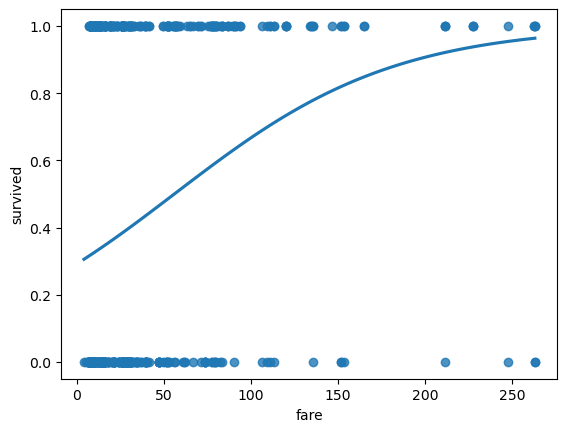

In [2]:
# Fit model
model = smf.logit(formula="survived ~ fare", data=df_titanic).fit()

# Show output
print("="*100+"""\n\nTitanic dataset
Predicting the probability of survival given the fare amount of the ticket"""+"\n\n"+"="*100)
print(model.summary())

# Plot regression
sns.regplot(x="fare", y="survived", data=df_titanic, logistic=True, ci=False)
plt.show()

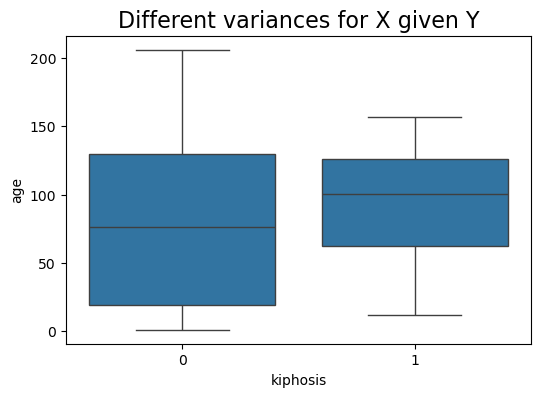


Kyphosis dataset
When considering age by itself is not significant (p-value>0.05).
After adding the squared term, age becomes significant


                           Logit Regression Results                           
Dep. Variable:               kiphosis   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                0.009934
Time:                        20:51:16   Log-Likelihood:                -27.252
converged:                       True   LL-Null:                       -27.526
Covariance Type:            nonrobust   LLR p-value:                    0.4596
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5727      0.602     -0.951      0.342      -1.753   

In [3]:
# Kiphosis example
age_1 = [12, 15, 42, 52, 59, 73, 82, 91, 96, 105, 114, 120, 121, 128, 130, 139, 139, 157]
age_0 = [1, 1, 2, 8, 11, 18, 22, 31, 37, 61, 72, 81, 97, 112, 118, 127, 131, 140, 151, 159, 177, 206]
df_kiphosis = pd.DataFrame({"kiphosis": [1]*len(age_1) + [0]*len(age_0) , "age":age_1+age_0})
df_kiphosis["age_sqrd"] = df_kiphosis["age"]**2

# Plot
plt.figure(figsize=(6,4))
sns.boxplot(x="kiphosis", y="age", data=df_kiphosis)
plt. title("Different variances for X given Y", fontsize=16)
plt.show()

print("="*100+"""\n\nKyphosis dataset
When considering age by itself is not significant (p-value>0.05).
After adding the squared term, age becomes significant\n\n"""+"="*100+"\n")
print(smf.logit(formula="kiphosis ~ age", data=df_kiphosis).fit(disp=False).summary(), "\n"*3)
print(smf.logit(formula="kiphosis ~ age + age_sqrd", data=df_kiphosis).fit(disp=False).summary())

## **2.3) Inference for logistic regression**

#### **Binary data can be grouped or ungrouped**  
When single binary outcome is reported it is called _ungrouped binary data_. In the case observations are the binomial counts of successes out of certain sample size. at the various combinations of values of the predictrs is refered as _grouped binary data_. The maximum likelihood estimates and standard error values are the same for either type of data type. When at least one explanatory vairable is continuous, binary data are naturally ungrouped.  

#### **Confidence intervals for effects.**  
A large-sample Wald confidenc interval for the parameter $\beta$ in the logistic model is
> $\hat{\beta} \pm \displaystyle z_{\alpha/2}(SE)$

Exponentiating the endpoints yields an interval for $e^\beta$, the multiplicative effect on the odds of a 1-unit increase in $x$.  
When $n$ is small or fitted probabilites are mainly near 0 or 1, it is preferable to construct a confiddnce interval based on the likelihood-ratio test of $H_0:\beta=\beta_0$.

#### **Significance testing**  
For the logstic regression model, $H_0:\beta=0$ stats that the probability of succcess is independen of $X$. For large sample, Wald test statistic has a standard normal distribution.  
> $z= \hat{\beta} / SE$

Although the Wald test is adequate for large samples, the likelihood-ratio test is more powerful and more reliable for sample sizes often used in practice. The test statistic compaes the maximum $L_0$ of the log-likelihood function when $\beta=0$ to the maximum $L_1$ of the log-likelihood function for unrestricted $\beta$. The test statistic $-2(L_o-L_1)$ also has a large-sample $\chi^2_{(1)}$ null distribution.  

#### **Confidence intervals for probabilities**  
Usually statistical software reports confidence intervals for probabilities. Nevertheless, the can be constructed by using the covariance matrix of the model parameter estimates.

> $Var(\hat{\beta_0} + \hat{\beta_1}x) = Var(\hat{\beta_0}) + x^2Var(\hat{\beta_1} + 2xCov(\hat{\beta_0}, \hat{\beta_1})) $

In [4]:
# Split dataset into train and test
df_titanic_train = df_titanic.sample(int(df_titanic.shape[0] * 0.80), random_state=314159).copy()
df_titanic_test = df_titanic[~df_titanic.index.isin(df_titanic_train.index)].copy()

# Define model with train dataset
model = smf.logit(formula = "survived ~ fare", data=df_titanic_train).fit(disp=0)

# Confidence interval for parameters estimation
print("="*100+"\n"+"Paremeters confidence interval")
print(model.conf_int().rename({0:"ci_lower", 1:"ci_upper"},axis=1))

# Get prediction confidence interval
print("="*100+"\n"+"Prediction intervals"+"\n")
print(model.get_prediction(df_titanic_test["fare"]).summary_frame().sample(10), "\n\n"+"="*100)

Paremeters confidence interval
           ci_lower  ci_upper
Intercept -1.162445 -0.683365
fare       0.011391  0.022415
Prediction intervals

     predicted        se  ci_lower  ci_upper
53    0.797332  0.050398  0.681013  0.878785
11    0.309874  0.023409  0.265952  0.357516
103   0.331111  0.022387  0.288787  0.376355
55    0.467507  0.025494  0.418028  0.517634
94    0.312848  0.023252  0.269171  0.360121
129   0.382441  0.021333  0.341585  0.425028
104   0.434457  0.023049  0.389943  0.480054
14    0.468349  0.025567  0.418722  0.518610
86    0.336750  0.022161  0.294779  0.381464
9     0.309874  0.023409  0.265952  0.357516 



## **2.4) Multiple logistic regression**

Logistic regression, like ordinary regression, can have multiple explanatory variables. Some or all of those precitrs can be categorical, rather than quantitative. The general logistic regression model with multiple explanatory variables. Denot the $k$ predictors for a binary response. The model is
> $logit[P(Y=!)] = \beta_0 + \beta_1 x_1 + \beta_2x_2 + ... + \beta_kx_k$


#### **Logistic regression with categorical predictors**  
Indicator variables represent cateogrios of predictors. Suppose a binary response $Y$ has two binary predictors $X$ and $Z$. Tlet $x$ and $z$ each take values _0_ and _1_ to represent the two categories of each explanatory variable.
> $logit[P(Y=1)] = \beta_0 + \beta_1x + \beta_2z$

These predictor variables are called _indicator variables_. THey indicate categories for the predictors. Indicator variables are also called _dummy variables_. In the absence of interaction the effect of one factor is the same at each category of the other factor.  

#### **Is a new variable worth included?**  
To test this it can be compraed the maximized log.likelihood valyes for that model and the simple model without the new terms. To test wheter the new term contributes to the model, a $\chi^2$ is utilized with a loglikelihood ratio test.
> _Given_  
> $L_0$: Maximized log-likelihood of the simpler model  
> $L_1$: Maximized log-likelihood of the full model  
>
> _The test statistic is computed as:_  
> $D = -2(L_0 - L_1)$
>
> And it's compared to the distribution  
> $ \displaystyle D \sim \chi^2_{p_1 - p_0} \qquad$ _where:_ $p_0:$ _Number of parameters in simpled model and_ $p_0:$ _Number of parameters in full model_

#### **Allowing interactions**
The models considered so far assume a lack of interaction. Intercation can be allowed by adding cross products of terms for two variables. Comparing the model with and without interaction can be achieved by a log-likelihood ratio test. If the test statistic is significant, is worth adding the interaction term.


                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  704
Model:                          Logit   Df Residuals:                      701
Method:                           MLE   Df Model:                            2
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                  0.2504
Time:                        20:51:16   Log-Likelihood:                -356.48
converged:                       True   LL-Null:                       -475.53
Covariance Type:            nonrobust   LLR p-value:                 1.983e-52
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6655      0.168      3.951      0.000       0.335       0.996
C(male)[T.1]    -2.3775      0.190    -12.534      0.000      -2.749      -2.006
fare             0.0121      0.003      4.5

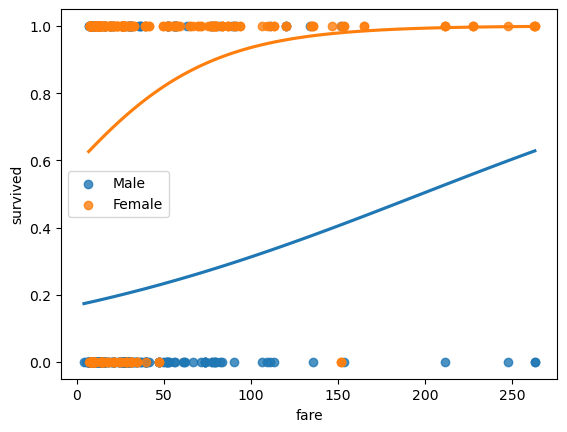

In [5]:
model = smf.logit(formula = "survived ~ fare + C(male)", data=df_titanic).fit(disp=False)
print("="*100+"\n")
print(model.summary())
print("="*100+"\n"*3)

# Plot separated models for sex
sns.regplot(x="fare", y="survived", data=df_titanic[df_titanic["male"]==1], logistic=True, ci=False, label="Male")
sns.regplot(x="fare", y="survived", data=df_titanic[df_titanic["male"]==0], logistic=True, ci=False, label="Female")
plt.legend()
plt.show()

## **2.6) Residuals inspecting**

Residuals are useful for identifying potential outliers or misspecified models. Two types of residuals are:  

#### **Pearson residuals:**
Measure the relative deviations between the observed and fitted values. The equation to compute them is:  
$r_i^P=\dfrac{Y_i - \hat{p}_i}{\sqrt{\hat{p}_i(1-\hat{p}_i)}}$

These can be standaardized to approximately follow a normal distributiom. This is performed mainly for the purpose of outlier detection. H_i represents the i-th element in the hat matrix $H=X(X^tX)^{-1}X^t$  

${r_i}^{P \; std} = \dfrac{r^P_i}{\sqrt{1-h_i}}$-1


#### **Deviance residuals**
It's a measure of how much each observation contributes to the overall residual deviance. Remember that residual deviance is computed as  

$Residual\;Deviance = 2\left[ Log-Likelihood(Saturated\;Model) - Log-Likelihood(Proposed\;Model) \right]$

Due to the independence assumption, the $LL$ can be expresed as a sum of factors for each observation. Denote $r_i^D$ as the deviance residual of observation i.

$\displaystyle Residual\;Deviance = \sum^n_{i=1} {r_i^D}^{\;2}$

Computing the residual deviance for each observation involves obtaining the likelihood function and can be extensive. Instead, libraries offer function to obtain them.



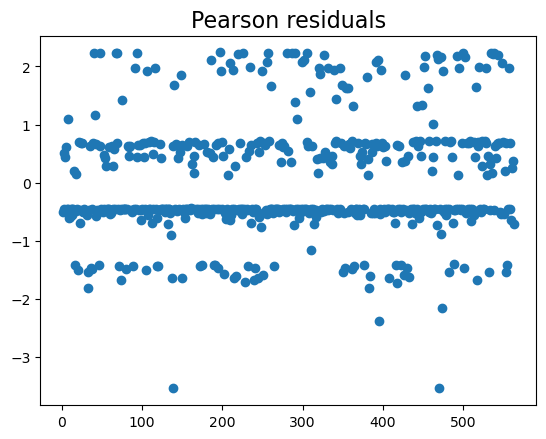


Based on Person residuals, these are some of the passengers detected as outliers

     survived  male    age      fare  class  child     fare_sqrd
498         0     0  25.00  151.5500  First      0  22967.402500
297         0     0   2.00  151.5500  First      1  22967.402500
27          0     1  19.00  263.0000  First      0  69169.000000
804         1     1  27.00    6.9750  Third      0     48.650625
127         1     1  24.00    7.1417  Third      0     51.003879
553         1     1  22.00    7.2250  Third      0     52.200625
510         1     1  29.00    7.7500  Third      0     60.062500
569         1     1  32.00    7.8542  Third      0     61.688458
455         1     1  29.00    7.8958  Third      0     62.343658
664         1     1  20.00    7.9250  Third      0     62.805625
579         1     1  32.00    7.9250  Third      0     62.805625
414         1     1  44.00    7.9250  Third      0     62.805625
400         1     1  39.00    7.9250  Third      0     62.805625
744    

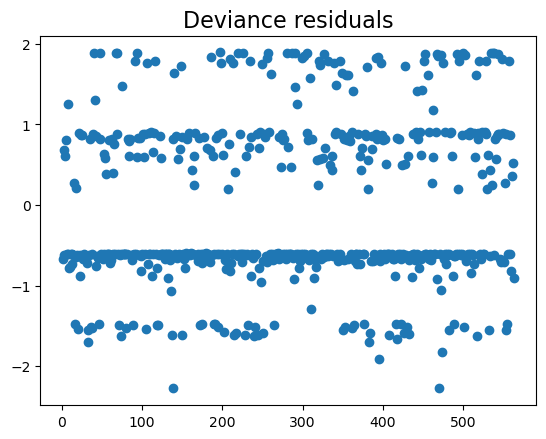





Based on Deviance residuals, these are some of the passengers detected as outliers

     survived  male    age      fare  class  child     fare_sqrd
498         0     0  25.00  151.5500  First      0  22967.402500
297         0     0   2.00  151.5500  First      1  22967.402500
27          0     1  19.00  263.0000  First      0  69169.000000
804         1     1  27.00    6.9750  Third      0     48.650625
127         1     1  24.00    7.1417  Third      0     51.003879
553         1     1  22.00    7.2250  Third      0     52.200625
510         1     1  29.00    7.7500  Third      0     60.062500
569         1     1  32.00    7.8542  Third      0     61.688458
455         1     1  29.00    7.8958  Third      0     62.343658
664         1     1  20.00    7.9250  Third      0     62.805625
579         1     1  32.00    7.9250  Third      0     62.805625
414         1     1  44.00    7.9250  Third      0     62.805625
400         1     1  39.00    7.9250  Third      0     62.805625
74

In [12]:
# Fit model
model = smf.logit(formula="survived ~ fare + male", data=df_titanic_train).fit(disp=False)

# Compute pearson residuals
predicted = model.predict(df_titanic_train)
residuals_pearson = (df_titanic_train["survived"] - predicted ) / (predicted*(1-predicted))**0.5
residuals_pearson = residuals_pearson / (1 - model.get_influence().hat_matrix_diag)**0.5

# Plot residuals
plt.scatter([i+1 for i in range(residuals_pearson.shape[0])], residuals_pearson)
plt.title("Pearson residuals", fontsize=16)
plt.show()

# Dhow outliers
print("="*100+"\n\nBased on Person residuals, these are some of the passengers detected as outliers"+"\n\n"+"="*100 )
print(df_titanic_train.loc[pd.Series(np.abs(residuals_pearson)).nlargest(20).index, :])

# Compute deviance residuals
residuals_deviance = model.resid_dev

# Plot deviance residuals
plt.scatter([i+1 for i in range(residuals_deviance.shape[0])], residuals_deviance)
plt.title("Deviance residuals", fontsize=16)
plt.show()

# Print deviance residuals outliers
print("\n"*3+"="*100+"\n\nBased on Deviance residuals, these are some of the passengers detected as outliers"+"\n\n"+"="*100 )
print(df_titanic_train.loc[pd.Series(np.abs(residuals_deviance)).nlargest(20).index, :])

## **2.5) Assessment metrics**

The next important step afer examining the coefficiens from a logistic regression model is evaluating the model through metrics. The most commonly used metrics include precision, recall, and accuracy. A confusion matriz helps summarize the performance of a classifier. THe componenets of a confusion matrix are used to compute metrics for evaluating logistic regression.

|  | Predicted <br> as POSITIVE | Predicted <br> as NEGATIVE |
|:----------:|:----------:|:----------:|
| **OBSERVED** <br> **as POSITIVE** | TRUE POSITIVE <BR> (TP) | FALSE NEGATIVE <BR> (FN) |
| **OBSERVED** <br> **as NEGATIVE** | FALSE POSITIVE <BR> (FP) | TRUE NEGATIVE <BR> (TN) |

Precision, also called **specifity** is especially helpful in cont4exts where the costo of a false positive is quite high and much higher than the cost of a false negative.  
Nothe that is the ratio of success when categorizing as positive.
> $Precision = \dfrac{TP}{TP + FP}$  

Recall, also called **sensitivity** is especially helpful in contexts where the cost of a false negative is quite high and much higher than the costo of a false positive.  
Note that is the that is the ratio of success of positive observations
> $Recall = \dfrac{TP}{TP + FN}$

Accuracy es especially helpful when you specifically want to know how much of the data at hand has been correctly categorized.  
Is the ratio of success of all observtions.
> $Accuracy = \dfrac{TP + TN}{Total}$


With a 0.50 threshold, the model predicted 54 person survived but actually 56 did

Precision:      74.07%
Recall:         71.43%
Accuracy: )     78.72%




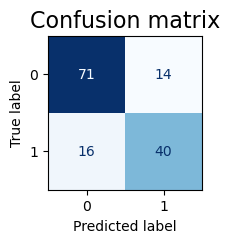

In [7]:
# Define model to be evaluated
model = smf.logit(formula = "survived ~ fare + fare_sqrd + C(male)", data=df_titanic_train).fit(disp=False)
prediction = model.predict(df_titanic_test[["fare", "fare_sqrd", "male"]])
prediction = (prediction >= 0.50).astype(int)

# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(df_titanic_test["survived"].values, prediction)
negatives = confusion_matrix[:,0]
positives = confusion_matrix[:,1]

# Print results
print("="*100+"\n")
print("With a 0.50 threshold, the model predicted {:.0f} person survived but actually {:.0f} did".format(prediction.sum(), df_titanic_test["survived"].sum()))
print("\nPrecision: {:>11.2%}".format(positives[1] / positives.sum()))
print("Recall: {:>14.2%}".format(positives[1] / (positives[1]+negatives[1])))
print("Accuracy: ){:>11.2%}".format((negatives[0]+ positives[1]) / df_titanic_test.shape[0]))
print("\n"+"="*100+"\n")

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(2,2))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
disp.plot(cmap="Blues", ax=ax, colorbar=False)
plt.title("Confusion matrix", fontsize=16)
plt.show()

## **2.6) Selecting a cut-off value**

Two additional metrics are defined. These are commonly used in data science and necessary for the following methodology.

> _Sensitivity = Precision = True Positive Rate_ $=\dfrac{TP}{TP + FN}$
> 
> _Specifity = True Negative Rate_ $=\dfrac{TN}{TN + FP}$


A Receiver Operating Characteristic (ROC) curve is a graphical representation used to assess the diagnostic ability of a binary classifier system as its discrimination threshold varies. The X-axis represents the "False Positive Rate" which is $1-Specifity$. On the Y-axis is plotted the "True Positive Rate", which is the same as _sensitivity_ and _precision_.

The selection of a cut-value depends on what is more important for the analysis, if maximizing the True Positive Rate or minimizing the False Positive Rate, depending on what is more unfavorable for the purpose of the model.  

The AUC (Area Under the Curve) quantifies the overall ability of the classifier to discriminate between positive and negative outcomes. It ranges between 0 and 1. When $AUC \in (0.5,1)$ the classifier has some discriminant ability. When $AUC \in (0,0.5)$ the classifier performs worse than a random guesser.

There are multiple approaches to select an optimal cut-off (threshold) probability. Again, it depends on what the priorities are, but these some of these methods are:  
> - Youden's J Statistic: Computed as $J = Sensitivity + Specifity - 1$. The cut-off point is for which J is maximized
>
> -   Closest to the top-left corner. An euclidian distance is computed for wehen $TPR=1$ and $FPR=0$. The point with the lowet value is selected.
>
> - Cost-based approach: Assigns a gain or loss function and determines for TPR or FPR and obtains the optimal point.  
>  
> -   etc.


**Notes:**  
> Any model above the diagonal performs better than a random classifier  
>
> A good classifier is close to the top left corner, meaning high TPR and low FPR.


Based on Youden's J statistic the optimal cutoff value is:
0.137

Based on distance to top-left corner the optimal cutoff value is:
0.336 



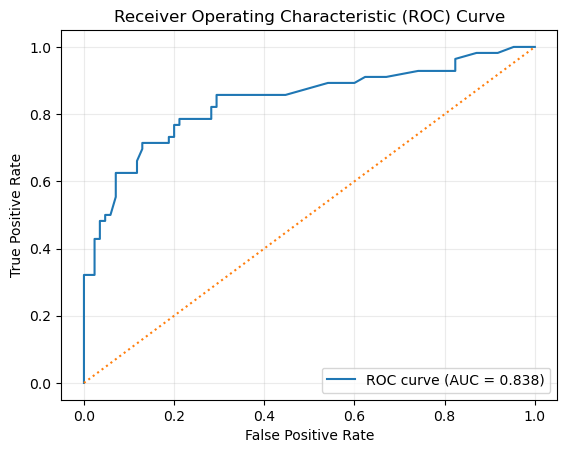

In [8]:
# Run model
categorical = ["male"]
continuous = ["fare", "fare_sqrd"]
eta = " + ".join(continuous + ["C("+var+")" for var in categorical])
model = smf.logit(formula = "survived ~ "+ eta, data=df_titanic_train).fit(disp=False)

# Compute predictec probabilities
df_titanic_test.["predicted_prob"] = model.predict(df_titanic_test[categorical+continuous])

# Compute the ROC curve and the AUC
fpr, tpr, cutoff = roc_curve(df_titanic_test["survived"], df_titanic_test["predicted_prob"])
roc_auc = auc(fpr, tpr)

# Define optima cutoff value and print result
J_index = (tpr + fpr).argmax()
dist_index = ((fpr**2 + (tpr-1)**2)**0.5).argmin()
print("="*100+"\n")
print("Based on Youden's J statistic the optimal cutoff value is:\n{:.3f}".format(cutoff[J_index]))
print("\nBased on distance to top-left corner the optimal cutoff value is:\n{:.3f}".format(cutoff[dist_index]),"\n\n"+"="*100)


# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.3f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle=":")  # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.25)
plt.show()